# Comparison of dimensional reduction algorithms

In [8]:
import numpy as np
import time

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({ 'font.size': 20, 'text.usetex': True })

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS, Isomap, SpectralEmbedding

# Some usefule functions

In [3]:
def groupDigits( y ):
    """Returns a list arrays. The arrays are the indices for the corresponding digit
       in the MNIST data set."""

    digits = []

    for i in range(10):
        inds = np.argwhere( y == i )
        digits.append( inds.reshape(len(inds)) )

    return digits

def sampleDigits( number, digits, N ):
    """Gives the indices for N samples of the digit number."""

    return np.random.choice( digits[number], N )

def plotDigits( data, N, digits, algo = "" ):
    """Plots a visualization of the reduced MNIST data set.
       Plots N samples of each digit."""
    
    plt.figure( 1, (10, 8) )
    plt.clf()

    for i in range(10):
        ind = sampleDigits( i, digits, N )

        plt.scatter( data[ind,0], data[ind,1], label = f"{i}" )
        
    plt.legend( loc = "best", title = "$\mathrm{Digits}$" )
    plt.title( r"$\textsc{mnist}$ $\mathrm{data}$ $\mathrm{reduced}$ $\mathrm{with}$ " + algo)

    plt.show()
    
    return

def sampleData( X, y, N ):
    """Selects N samples of each digit. The data set is too large for most of the algorithms to properly run."""
    
    digits = groupDigits(y)
    
    samples = np.array([], dtype = int)
    
    for i in range(10):
        samples = np.append( samples, sampleDigits( i, digits, N ) )
        
    np.random.shuffle(samples)
    
    return (X[samples], y[samples])
    

# Load MNIST data

In [10]:
mnist = fetch_mldata( "MNIST original" )
X, y = mnist.data, mnist.target

X, y = sampleData( X, y, 1000 )
digits = groupDigits( y )

## Principle Component Analysis (PCA)

In [11]:
reducer = PCA( n_components = 2 )

t1 = time.time()
reduced = reducer.fit_transform( X )
t2 = time.time()

print(f"Reduced in {t2 - t1 : 3.1f}s.")

Reduced in  3.9s.


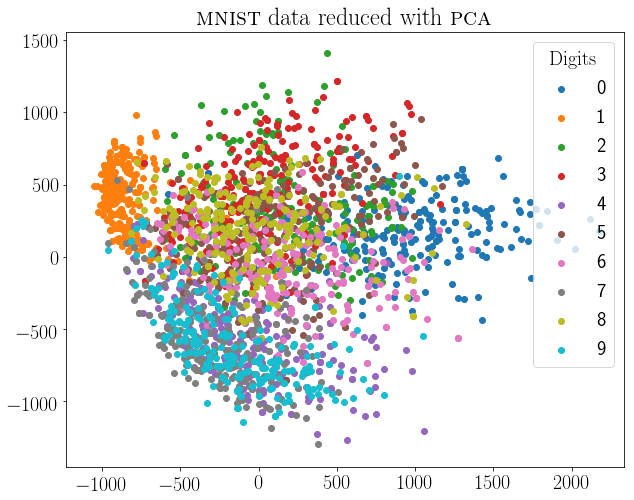

In [12]:
plotDigits( reduced, 250, digits, algo = r"$\textsc{pca}$" )

# Locally Linear Embedding (LLE)

In [13]:
reducer = LocallyLinearEmbedding( n_components = 2, n_jobs = -1 )

t1 = time.time()
reduced = reducer.fit_transform( X )
t2 = time.time()

print(f"Reduced in {t2 - t1 : 3.1f}s.")

Reduced in  65.7s.


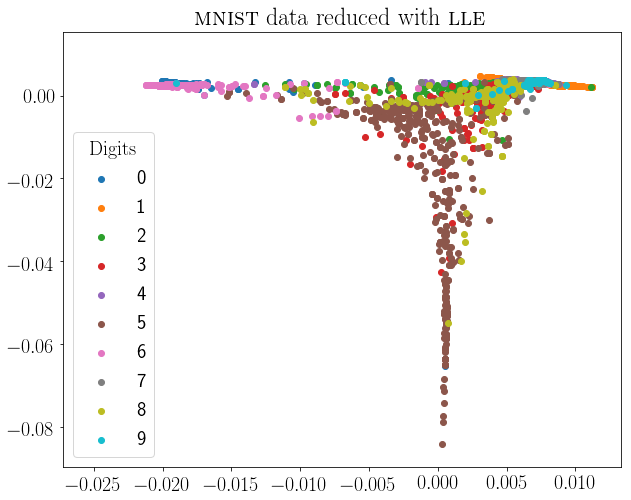

In [15]:
plotDigits( reduced, 500, digits, algo = r"$\textsc{lle}$" )

# t-Distributed Stochastic Neighbourhood Embedding (t-SNE)

In [31]:
reducer = TSNE( n_components = 2 )

t1 = time.time()
reduced = reducer.fit_transform( X )
t2 = time.time()

print(f"Reduced in {t2 - t1 : 3.1f}s.")

Reduced in 291.4s.


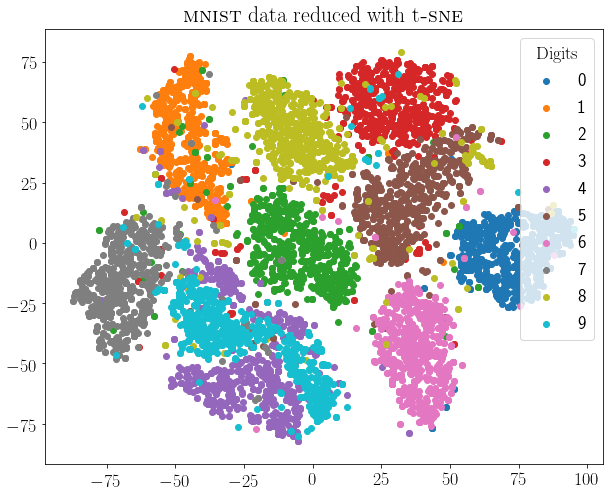

In [36]:
plotDigits( reduced, 800, digits, algo = r"$\mathrm{t}\textsc{-sne}$" )

# Isomap

In [38]:
reducer = Isomap( n_components = 2, n_jobs = -1 )

t1 = time.time()
reduced = reducer.fit_transform( X )
t2 = time.time()

print(f"Reduced in {t2 - t1 : 3.1f}s.")

Reduced in  110.7s.


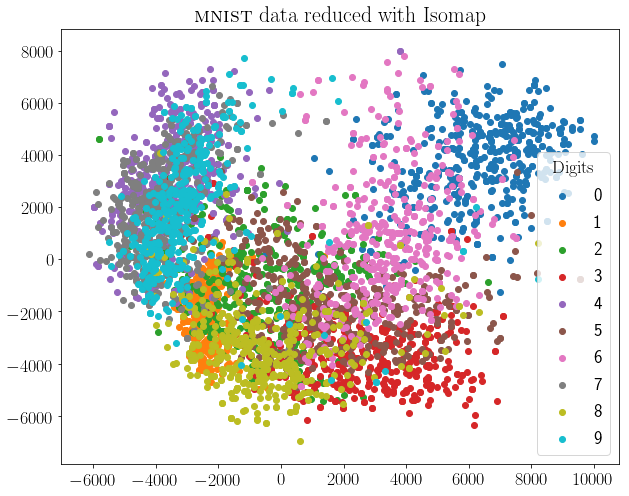

In [41]:
plotDigits( reduced, 500, digits, algo = r"$\mathrm{Isomap}$" )

# Spectral Embedding

In [42]:
reducer = SpectralEmbedding( n_components = 2, n_jobs = -1 )

t1 = time.time()
reduced = reducer.fit_transform( X )
t2 = time.time()

print(f"Reduced in {t2 - t1 : 3.1f}s.")

Reduced in  177.1s.


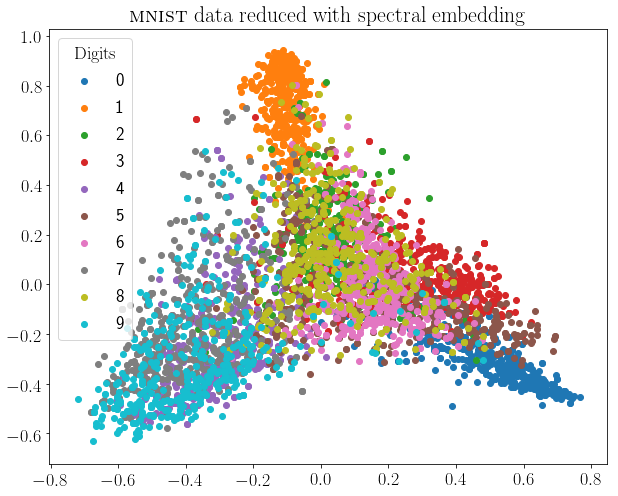

In [43]:
plotDigits( reduced, 500, digits, algo = r"$\mathrm{spectral}$ $\mathrm{embedding}$" )

# Multidimensional Scaling (MDS)

In [6]:
#Very memory intensive, must reduce  futher:
mnist = fetch_mldata( "MNIST original" )
X, y = mnist.data, mnist.target

X, y = sampleData( X, y, 400 )
digits = groupDigits( y )

reducer = MDS( n_components = 2, n_jobs = -1 )

t1 = time.time()
reduced = reducer.fit_transform( X )
t2 = time.time()

print(f"Reduced in {t2 - t1 : 3.1f}s.")

Reduced in  257.4s.


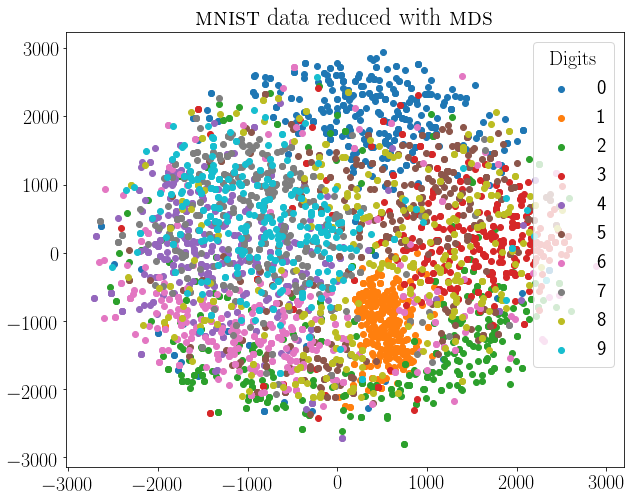

In [9]:
plotDigits( reduced, 400, digits, algo = r"$\textsc{mds}$" )